# Bike Sharing Demand
This dataset consists of the number of public bikes rented in Seoul's bike sharing system at each hour. It also includes information about the weather and the time, such as whether it was a public holiday.

In [62]:
import pandas as pd 
import os
pd.read_csv('data/SeoulBikeData.csv') 

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [63]:
df = pd.read_csv('data/SeoulBikeData.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
Date                        8760 non-null object
Rented Bike Count           8760 non-null int64
Hour                        8760 non-null int64
Temperature(C)              8760 non-null float64
Humidity(%)                 8760 non-null int64
Wind speed (m/s)            8760 non-null float64
Visibility (10m)            8760 non-null int64
Dew point temperature(C)    8760 non-null float64
Solar Radiation (MJ/m2)     8760 non-null float64
Rainfall(mm)                8760 non-null float64
Snowfall (cm)               8760 non-null float64
Seasons                     8760 non-null object
Holiday                     8760 non-null object
Functioning Day             8760 non-null object
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


[Source of dataset](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand). 

**Citations**:
- Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
- Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020 

We can see that we have 13 columns, the first column which is date several numerical columns and 3 categorical columns. There are no Nan entries.


## 📖 Background

We work for the Bike renting system team of Seul city, and the department is looking to predict how many bikes will be rented according to several parameters they have recorded.

The department is trying to learn more about the characteristics that increase the probability of renting bikes.


In [64]:
# importing packages

# importing packages 

Let's first import some packages to perfomr a exploratory data analysis


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
sns.set_theme(style="whitegrid")

# Exploratory data analysis

## Exploring the data set
Lets First start studying the data set itself.
⌛️ EXPLORATORY DATA ANALYSIS

Still, before diving deeper into the analysis, the our available data has to be examined and, if necessary, properly cleaned.

### Shape duplicates and type of columns

In [67]:
df.Date = pd.to_datetime(df.Date)
print(f"there are {df.shape[0]} entreis and {df.shape[1]} columns or features") 

there are 8760 entreis and 14 columns or features


Lets identify if there are duplicates

In [68]:
# Check for duplicates
dups = df[df.duplicated(['Date'])]
print(len(dups))

8395


From the upper result we can see that there are several entries for the same day but these can be for different hours, lets try to further explore this case.

In [69]:
df.groupby(["Date", "Hour"]).size().shape

(8760,)

As predicted we can see that for a same day there are seveeral hours recorded, and therefore, there are no duplicated entries in the data set

# **Reting of bikes over time**

In [70]:
print(f"start day: {df.Date.min()}; Final day: {df.Date.max()}")

start day: 2017-01-12 00:00:00; Final day: 2018-12-11 00:00:00


The data frame starts the first of 12 of january 2017 and end the 11 december 2018.

Lets evaluate the time trace of renting bikes along the time

In [71]:
#target varaible
tv = "Rented Bike Count"

Text(0.5,0,'Time')

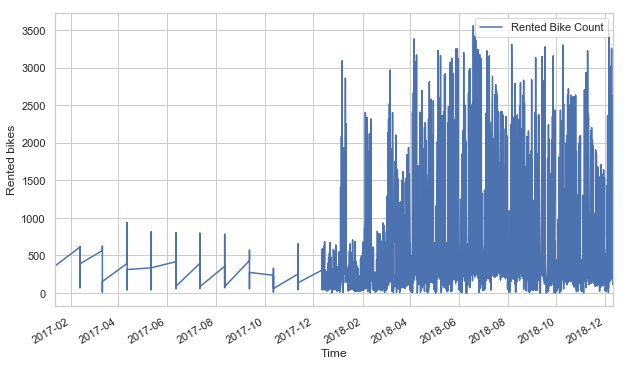

In [72]:
df.plot(x="Date", y=tv, figsize=(10, 6))
plt.ylabel("Rented bikes")
plt.xlabel("Time")

This is an interesting time line that may complicate the  analysis. Lets keep exploring this.

### Study of years and day of week

2018    8016
2017     744
Name: year, dtype: int64

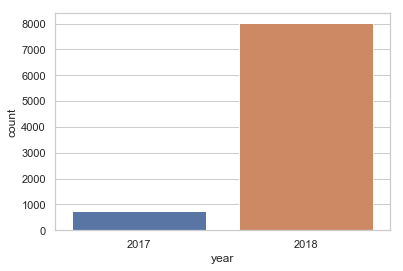

In [73]:
df["year"] = df.Date.dt.year.astype(int)
df["day"] = df.Date.dt.day_name()
sns.countplot(x="year", data=df)
df.year.value_counts()

We have 8016 entries for 2018 and only 744 for 2017, this is important to consider when we will split the data set.

In [74]:
df[(df.year == 2017) & (df.Seasons == "Spring")]

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,day


Sunday       1296
Tuesday      1272
Wednesday    1272
Saturday     1248
Thursday     1248
Friday       1224
Monday       1200
Name: day, dtype: int64

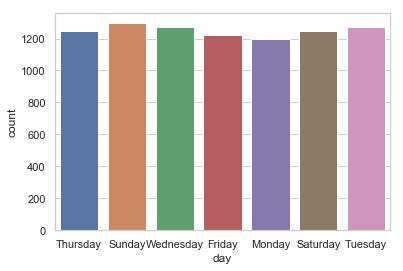

In [75]:
sns.countplot(x="day", data=df)
df.day.value_counts()

The information according to the days od the week is prety weell spreed

Finally lets explore the data according to the season

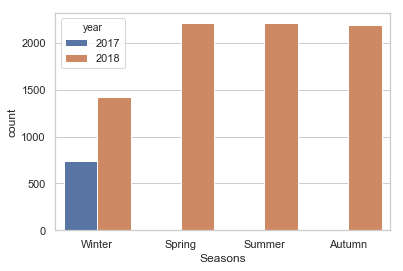

In [76]:
sns.countplot(x="Seasons", hue="year", data=df)

In [77]:
pd.crosstab(df.Seasons,df.year)

year,2017,2018
Seasons,,
Autumn,0,2184
Spring,0,2208
Summer,0,2208
Winter,744,1416


It is clear that there are no data available for any season except for winter in the year 2017

Finally we can see that we have similar values for all seasons, this means tha the winter data for 2018 is less. We can see this with the following table

We can see that we have more entries in the data set in summer than in winter

# Exploring the amount of rented bikes

realtion between the number of reting bikes and several conditions such as temperature humidity or the hour of the day, might be very important

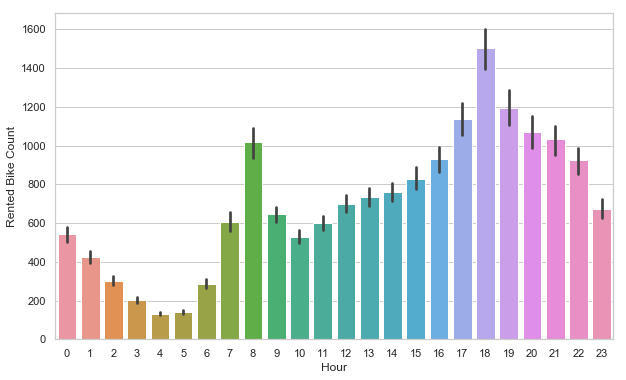

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Hour", y=tv)

The first insigth we gain is that generally bikes are rented more during the afternoon  between 17 and 20 h and in the early morning around 8 am

## exploring the weather condition

Let now explore some of the weather conditions, a good visualization is to do a correaltion plot. 

To do that lets first explore the variable separately


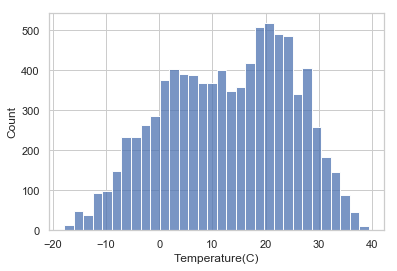

In [79]:
sns.histplot(data=df, x="Temperature(C)")

We can observe that the temperature  varies from -20 ºC to up to 40 ºC 

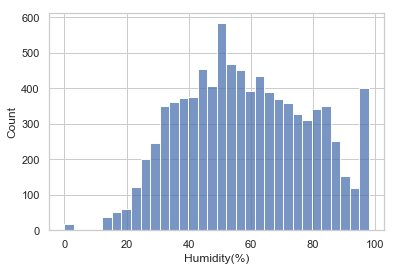

In [80]:
sns.histplot(data=df, x="Humidity(%)")

We can observe that the temperature  varies from around 20% to nearly 100%

In [81]:
df["Rainfall(mm)"].value_counts().head(10)

0.0    8232
0.5     116
1.0      66
1.5      56
0.1      46
2.0      31
2.5      23
0.2      20
3.5      18
0.4      16
Name: Rainfall(mm), dtype: int64

In [82]:
def plot_reting_with_condition(condition, bins, labels):
    df2 = df.copy()
    df2["new"] = pd.cut(df[condition], bins, labels=labels)
    ax = sns.barplot(data=df2, x="new", y="Rented Bike Count")
    plt.ylabel("Sum of rented bikes")
    plt.xlabel(condition)
    return ax

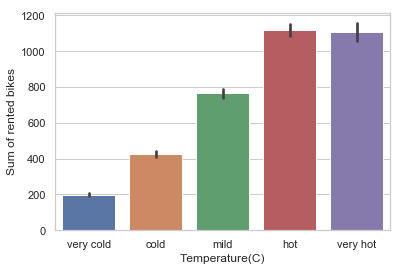

In [83]:
t_bins = [-20, 0, 10, 20, 30, 40]
labels = ["very cold", "cold", "mild", "hot", "very hot"]
plot_reting_with_condition("Temperature(C)", t_bins, labels)

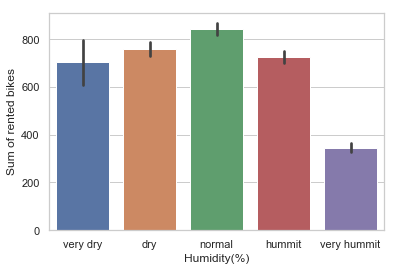

In [84]:
t_bins = [ 0, 20, 40, 60, 80, 100]
labels = ["very dry", "dry", "normal", "hummit", "very hummit"]
plot_reting_with_condition("Humidity(%)", t_bins, labels)

The to grapths from above reveal that people do not rent bikes when:
- is very hummit.
- when is very cold.

# Study the correlations between weahter conditions and bike renting

The bike renting is probably very correlated or anticorrelated with the weather conditions, therefore let's study the realtion with the amount of bikes rented and several parameters.
- Temperature
- HUmidity
- Wind speed
- Visibility
- etc ...

In [85]:
weather_cols = ["Rented Bike Count", "Temperature(C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(C)",\
                "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)"]

df_weather = df[weather_cols]
df_weather.head()

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000189B54FABE0>,
      dtype=object)

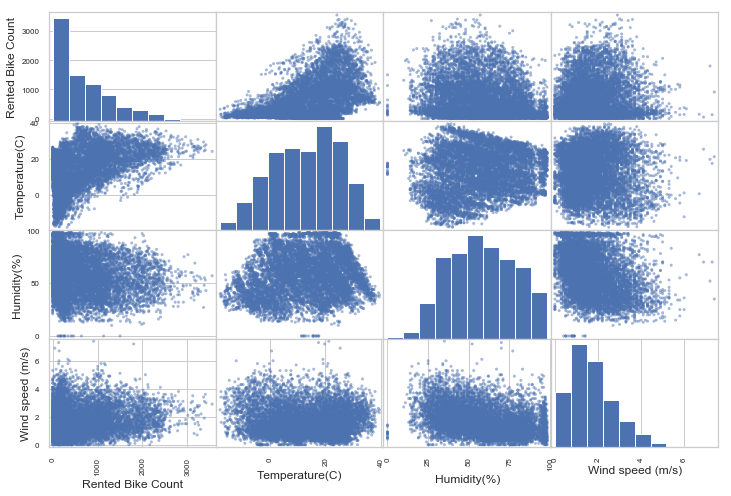

In [86]:
from pandas.plotting import scatter_matrix

attr = ["Rented Bike Count", "Temperature(C)", "Humidity(%)", "Wind speed (m/s)"]
scatter_matrix(df_weather[attr], figsize=(12,8))

The correlation between this variables can be calculated with a pearson correlation matrix.
- High values of correlation indicate that when 1 variable increases the second two
- Low values of correlation indicate the opposite

In this sense we can see that the renting of bikes is positive correlated with the temperature. Let's keep exploring this variable

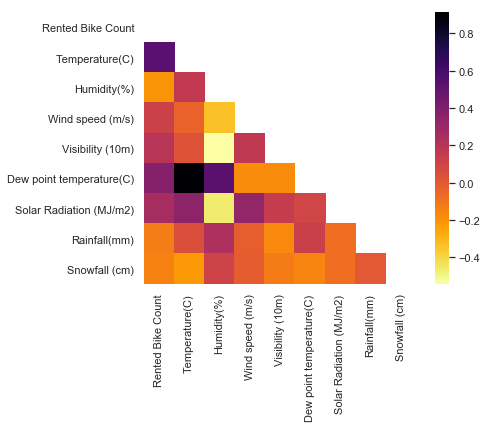

In [87]:
corr = df_weather.corr(method='pearson')
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap="inferno_r")
#sns.heatmap(corr, cmap="inferno_r")

From the correlation map we observe that the "rented bike count" is highly correlate with:
- temperature and dew point temperature, 
- solar radiation 
- visibility. 

This means whne this variaables are high (e.g.: high temperature) more bikes are rented.



Similarly is anti-correlated with:
- rain 
- snow 

This indicates that less people get the bikes when is raining or when is snowing.


In [88]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df_weather_st = scaler.fit_transform(df_weather)

# Feature Engineering

The first features we added are previously: 

- **The day of the week:** this must be very important since, for example on Sundays the amount of bikes rented is less
- **The year:** The number of bikes rented in 2017 correspond only to winter Season and there much less

In [89]:
df["month"] = df.Date.dt.month

The month and Hour values can be tricky. For example january month 0 is much closer to december month 11 than to april month 3. Similarly the hour 1 is closer to 24 than to hour 6. Lets indicate about this circularity to our data.

In [90]:
df['cos_month'] = np.cos((df.month) / 12 * 2 * np.pi)
df['sin_month'] = np.sin((df.month) / 12 * 2 * np.pi)

In [91]:
df['cos_hour'] = np.cos((df.Hour) / 24 * 2 * np.pi)
df['sin_hour'] = np.sin((df.Hour) / 24 * 2 * np.pi)
df = df.drop(["Date", "Hour", "month"], axis=1)

In [92]:
df[df.cos_month == -1]

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,day,cos_month,sin_month,cos_hour,sin_hour
120,145,-2.8,77,0.0,331,-6.2,0.0,0.1,0.1,Winter,No Holiday,Yes,2017,Monday,-1.0,1.224647e-16,1.000000,0.000000
121,144,-3.0,79,0.0,293,-6.1,0.0,0.0,0.3,Winter,No Holiday,Yes,2017,Monday,-1.0,1.224647e-16,0.965926,0.258819
122,117,-3.0,79,0.0,1862,-6.1,0.0,0.0,0.4,Winter,No Holiday,Yes,2017,Monday,-1.0,1.224647e-16,0.866025,0.500000
123,78,-3.2,78,0.0,1808,-6.4,0.0,0.2,0.4,Winter,No Holiday,Yes,2017,Monday,-1.0,1.224647e-16,0.707107,0.707107
124,58,-3.4,75,0.0,1982,-7.2,0.0,0.0,0.4,Winter,No Holiday,Yes,2017,Monday,-1.0,1.224647e-16,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8179,0,13.3,72,1.1,234,8.3,0.0,0.0,0.0,Autumn,No Holiday,No,2018,Monday,-1.0,1.224647e-16,0.258819,-0.965926
8180,0,13.2,73,1.1,246,8.4,0.0,0.0,0.0,Autumn,No Holiday,No,2018,Monday,-1.0,1.224647e-16,0.500000,-0.866025
8181,0,13.0,76,0.9,231,8.8,0.0,0.0,0.0,Autumn,No Holiday,No,2018,Monday,-1.0,1.224647e-16,0.707107,-0.707107
8182,0,12.3,73,1.2,277,7.5,0.0,0.0,0.0,Autumn,No Holiday,No,2018,Monday,-1.0,1.224647e-16,0.866025,-0.500000


Finally an important value that can affect is the thermal sensation which is a relation with humidity wind speed and temperature:

From Wikipedia we will use the Autralian apparent temperature, (maybe best model due to proximity of australia with Korea)

In [93]:
def vapor_pressure(humidity, temperature):
    exp = ((17.27 *temperature)/(temperature + 237.7))
    vp = humidity/100*6.15**exp
    return vp

def aparent_temp(temperature, humidity, wind_speed):
    return temperature + 0.33 * vapor_pressure(humidity, temperature) -0.7*wind_speed - 4


In [94]:
apparent_temp = []
for row in df.iterrows():
    app_temp = aparent_temp(row[1]["Temperature(C)"], row[1]["Humidity(%)"], row[1]["Wind speed (m/s)"])
    apparent_temp.append(app_temp)
df["app_temperature"] = apparent_temp

Text(0.5,0,'thermal sensation (ºC)')

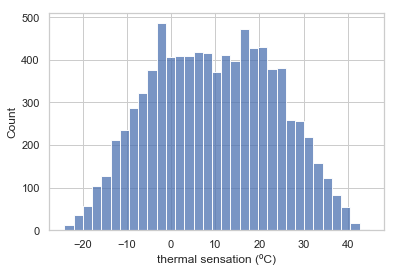

In [95]:
sns.histplot(data=df, x="app_temperature")
plt.xlabel("thermal sensation (ºC)")

# **Data preparation and splitting**

Fisrt lest transform the categorical columns into numerical using OneHotEncoder

In [96]:
df.dtypes

Rented Bike Count             int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
year                          int32
day                          object
cos_month                   float64
sin_month                   float64
cos_hour                    float64
sin_hour                    float64
app_temperature             float64
dtype: object

In [97]:
df.head()

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,day,cos_month,sin_month,cos_hour,sin_hour,app_temperature
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Thursday,0.866025,0.5,1.000000,0.000000,-10.679465
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Thursday,0.866025,0.5,0.965926,0.258819,-10.000352
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Thursday,0.866025,0.5,0.866025,0.500000,-10.642881
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Thursday,0.866025,0.5,0.707107,0.707107,-10.773023
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Thursday,0.866025,0.5,0.500000,0.866025,-11.557275


In [98]:
df["Functioning_Day_int"]= df["Functioning Day"].map({'Yes': 1, "No": 0})
df["Holiday_int"] = df.Holiday.map({'No Holiday': 0, "Holiday": 1})
df2 = df.drop(["Functioning Day", "Holiday"], axis=1)

In [99]:
df2.head()

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,year,day,cos_month,sin_month,cos_hour,sin_hour,app_temperature,Functioning_Day_int,Holiday_int
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,2017,Thursday,0.866025,0.5,1.000000,0.000000,-10.679465,1,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,2017,Thursday,0.866025,0.5,0.965926,0.258819,-10.000352,1,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,2017,Thursday,0.866025,0.5,0.866025,0.500000,-10.642881,1,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,2017,Thursday,0.866025,0.5,0.707107,0.707107,-10.773023,1,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,2017,Thursday,0.866025,0.5,0.500000,0.866025,-11.557275,1,0


In [100]:
df2.dtypes

Rented Bike Count             int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
year                          int32
day                          object
cos_month                   float64
sin_month                   float64
cos_hour                    float64
sin_hour                    float64
app_temperature             float64
Functioning_Day_int           int64
Holiday_int                   int64
dtype: object

In [101]:
df_cat = pd.get_dummies(df2.select_dtypes(include='object'))
df_float = df2.select_dtypes(exclude='object')

In [102]:
df_prep = pd.concat([df_float, df_cat], axis=1)

### Splitting the data

We need to remember that we do not have many values from 2017 year, and these are only for winter, this parameters might be very important since in 2017 the number of bikes rented was low, therefore we need a stratified split.



In [105]:
df_prep.year.value_counts()

2018    8016
2017     744
Name: year, dtype: int64

In [106]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=4)
for train_index, test_index in splitter.split(df_prep, df_prep.year):
    strat_train_set = df_prep[df_prep.index.isin(train_index)]
    strat_test_set = df_prep[df_prep.index.isin(test_index)]

In [107]:
print(strat_train_set.shape)
print(strat_test_set.shape)

(7008, 28)
(1752, 28)


We can see that year is a int 64 column. Since there are only 2017 and 1028 values we can transform to string and convert it 0 or 1

In [108]:
y_train = strat_train_set[tv]
X_train = strat_train_set.drop(tv, axis=1)
y_test = strat_test_set[tv]
X_test = strat_test_set.drop(tv, axis=1)

In [109]:
X_train.dtypes

Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
year                          int32
cos_month                   float64
sin_month                   float64
cos_hour                    float64
sin_hour                    float64
app_temperature             float64
Functioning_Day_int           int64
Holiday_int                   int64
Seasons_Autumn                uint8
Seasons_Spring                uint8
Seasons_Summer                uint8
Seasons_Winter                uint8
day_Friday                    uint8
day_Monday                    uint8
day_Saturday                  uint8
day_Sunday                    uint8
day_Thursday                  uint8
day_Tuesday                   uint8
day_Wednesday                 uint8
dtype: object

# **Model selection**


Since we have several categorical features, we will initially use a tree based model

**XGBoost:**

Gradient boosting models generally work very well, a lot of decision trees to reduce variance and learning from previous trees errors (not like random forest)


In [325]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
import time
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, r2_score

mse_scorer = make_scorer(mean_squared_error)
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

In [122]:
xgb_param_grid = {
    'max_depth': [3, 4, 6],
    'colsample_bytree': [0.5, 1],
    'n_estimators': [500]
}

In [123]:
xgb_gs = GridSearchCV(
    estimator=XGBRegressor(), 
    param_grid=xgb_param_grid,
    cv=5,
    scoring=mae_scorer,
    return_train_score=False,
    verbose=3,
    n_jobs=-1
)

xgb = XGBRegressor(n_estimators=500, max_depth=5, colsample_bytree=0.7)

In [382]:
%%time
xgb.fit(X_train.values, y_train.values)

Wall time: 1.6 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.300000012,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=500, n_jobs=8,
       num_parallel_tree=1, objective='reg:squarederror', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       subsample=1, tree_method='exact', validate_parameters=1,
       verbosity=None)

In [383]:
%%time
xgb_gs.fit(X_train.values, y_train.values)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   30.2s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   32.3s finished


Wall time: 34.7 s


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None,
       enable_categorical=False, gamma=None, gpu_id=None,
       importance_type=None, interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_..._weight=None,
       subsample=None, tree_method=None, validate_parameters=None,
       verbosity=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 4, 6], 'colsample_bytree': [0.5, 1], 'n_estimators': [500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=make_scorer(mean_absolute_error), verbose=3)

In [127]:
cv_res = pd.DataFrame(xgb_gs.cv_results_).sort_values('mean_test_score')
# for more clarity
cv_res = cv_res[['mean_test_score'] + [colname for colname in cv_res.columns if 'param_' in colname]]

In [128]:
cv_res.head()

,mean_test_score,param_colsample_bytree,param_max_depth,param_n_estimators
1,246.586065,0.5,4,500
2,246.700535,0.5,6,500
5,249.681153,1,6,500
0,265.360088,0.5,3,500
4,268.703015,1,4,500


lets evaluate the feture importance

In [134]:
feature_importance = pd.DataFrame(index=X_train.columns, data=xgb_gs.best_estimator_.feature_importances_)
feature_importance = feature_importance.sort_values(0, ascending=False)
feature_importance

,0
Seasons_Winter,0.477693
Functioning_Day_int,0.152541
Temperature(C),0.074689
sin_hour,0.068972
Rainfall(mm),0.043001
Seasons_Autumn,0.042405
cos_hour,0.026075
Humidity(%),0.024476
Solar Radiation (MJ/m2),0.018277
day_Sunday,0.008660


In [161]:
%%time

cv_preds = cross_val_predict(
        estimator=xgb_gs.best_estimator_,
        X=X_train, 
        y=y_train,
        cv=5,
        n_jobs=-1
    )

Wall time: 9.57 s


In [206]:
preds = pd.DataFrame(cv_preds)
preds['real'] = y_train
preds

,0,real
0,84.624634,NaN
1,93.793808,204.0
2,13.968400,173.0
3,87.353630,107.0
4,132.129730,78.0
...,...,...
7003,866.057922,0.0
7004,493.584869,0.0
7005,469.516693,0.0
7006,127.059532,0.0


This is really interesting we have several days where the real number of rented bikes is zero and the predicted value is quite high. 

Let's explore this further

In [197]:
index_zero = preds[preds.real == 0].index

In [202]:
zero_rented = df[df.index.isin(index_zero)]

In [210]:
print(zero_rented.shape)
zero_rented.Functioning_Day_int.sum()

(56, 21)


0

All days that the real value was zero where days that the working sytem was not working

# Testing our model

In [350]:
def calculate_metrics(y_real, y_pred, metric):
    return metric(y_real, y_pred)

def model_evaluate(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    metrics = {}
    #RMSE Test
    rmse_test = np.sqrt(calculate_metrics(y_test, y_pred, mean_squared_error))
    #RMSE Train
    rmse_train = np.sqrt(calculate_metrics(y_train, y_pred_train, mean_squared_error))
    r2_test = calculate_metrics(y_test, y_pred, r2_score)
    r2_train = calculate_metrics(y_train, y_pred_train, r2_score)
    metrics = {
              'RMSE Test': rmse_test,
              'RMSE Train': rmse_train,
              'r2 Test': r2_test,
              'r2 Train': r2_train}

    return metrics 

In [ ]:
mean_absolute_error(y_test, test_predictions.raw_preds.values)

In [297]:
train_pred = xgb_gs.predict(X_train)
mean_squared_error(y_train, train_pred)

18457.018187884885

In [298]:
r2_score(y_train, train_pred)

0.9558705793359519

In [299]:
r2_score(y_test, raw_preds)

0.9007630271092645

Lets evaluate where the model may fail, for example lets check if we predict negative values, which should be imposible

In [357]:
#index_correct = X_test[X_test.Functioning_Day_int == 0].index

raw_preds = xgb_gs.predict(X_test)

test_predictions = pd.DataFrame(np.array([X_test.index, raw_preds, y_test]).T, columns= ['index', 'raw_preds', 'real value'])
test_predictions = test_predictions.set_index("index")
#for i in index_correct.values:
#    test_predictions.loc[[i]]["raw_preds"] == 0
test_predictions[test_predictions.raw_preds < 0]


,raw_preds,real value
index,,
29.0,-0.579016,79.0
421.0,-44.939438,76.0
509.0,-82.377380,76.0
533.0,-69.917191,59.0
534.0,-50.108910,63.0
...,...,...
8187.0,-56.647923,40.0
8235.0,-152.319336,0.0
8245.0,-391.511475,0.0


Indeed we are predicting negative values, this may happend with a XGBOOST model, but does not happend with other ensemble methods

# Trying a second model, lets check how a randomForest perfomrs

In [359]:
forest_params_grid = xgb_param_grid = {
    'max_depth': [20, 30, 40, 50, 70],
    'n_estimators': [200, 150, 125, 100],
    'max_features' : ["auto", "sqrt", 5, 10, 20],
}
rd_forest = GridSearchCV(estimator=RandomForestRegressor(), 
                         param_grid=forest_params_grid, 
                         scoring='neg_mean_squared_error', 
                         cv=3,
                         return_train_score=False,
                         verbose=3,
                         n_jobs=-1)


In [360]:
rd_forest.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [20, 30, 40, 50, 70], 'n_estimators': [200, 150, 125, 100], 'max_features': ['auto', 'sqrt', 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='neg_mean_squared_error', verbose=3)

In [368]:
rd_forest.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [369]:
f_importance = pd.DataFrame(index=X_train.columns, data=rd_forest.best_estimator_.feature_importances_)
f_importance

,0
Temperature(C),0.224189
Humidity(%),0.075590
Wind speed (m/s),0.011814
Visibility (10m),0.012937
Dew point temperature(C),0.023435
Solar Radiation (MJ/m2),0.058263
Rainfall(mm),0.045871
Snowfall (cm),0.000500
year,0.000336
cos_month,0.009334


In [378]:
raw_preds = rd_forest.best_estimator_.predict(X_test)
r2_score(y_test, raw_preds)

0.9122008807332502

In [372]:
pred = rd_forest.best_estimator_.predict(X_train)
r2_score(y_train, pred)

0.9849251148361573

In [379]:
test_predictions = pd.DataFrame(np.array([X_test.index, raw_preds, y_test]).T, columns= ['index', 'raw_preds', 'real value'])
test_predictions = test_predictions.set_index("index")
#for i in index_correct.values:
#    test_predictions.loc[[i]]["raw_preds"] == 0
test_predictions[test_predictions.raw_preds < 0]


,raw_preds,real value
index,,


As expected, with a random forest we do not have negative predicted values (values out of the prediction range)

In [373]:
cv_preds = cross_val_predict(
        estimator=rd_forest.best_estimator_,
        X=X_train, 
        y=y_train,
        cv=5,
        n_jobs=-1
    )

In [374]:
metric = model_evaluate(rd_forest.best_estimator_, X_train, y_train, X_test, y_test)
metric

{'RMSE Test': 189.00066659758784,
 'RMSE Train': 79.40423451064292,
 'r2 Test': 0.9122008807332502,
 'r2 Train': 0.9849251148361573}

# Summing up both predictions

lets now sum-up the predictions of both the XGBOOST and the randomForest 

In [380]:
def ensemble_metric(models, X_train, X_test):
    preds_train = []
    preds_test = []
    for model in models:
        preds_train.append(model.predict(X_train))
        preds_test.append(model.predict(X_test))
    preds_train_mean = sum(preds_train)/len(models)
    preds_test_mean = sum(preds_test)/len(models)
    return preds_train_mean, preds_test_mean

def get_metrics(y_train, y_pred_train, y_test, y_pred):
    rmse_test = np.sqrt(calculate_metrics(y_test, y_pred, mean_squared_error))
    #RMSE Train
    rmse_train = np.sqrt(calculate_metrics(y_train, y_pred_train, mean_squared_error))
    r2_test = calculate_metrics(y_test, y_pred, r2_score)
    r2_train = calculate_metrics(y_train, y_pred_train, r2_score)
    metrics = {
              'RMSE Test': rmse_test,
              'RMSE Train': rmse_train,
              'r2 Test': r2_test,
              'r2 Train': r2_train}
    return metrics


In [381]:
preds_train_mean, preds_test_mean = ensemble_metric([xgb_gs, rd_forest], X_train, X_test)
metrics = get_metrics(y_train, preds_train_mean, y_test, preds_test_mean)
metrics

{'RMSE Test': 181.27159793663958,
 'RMSE Train': 100.24154590284672,
 'r2 Test': 0.9192350341332308,
 'r2 Train': 0.9759750663415167}

We have achieved nearly a 0.92 r2 value